# Автовыделение интервалов коллектора по данным ГИС
В данном упражнении предлагается использовать знания, полученные во время обучения, для решения задачи автоматической интерпретации каротажных кривых.

## Описание кейса

На основе седиментологического описания одного из обнажений Шестаковского полигона, расположенного в Томской области, была построена синтетическая 3D геологическая модель.
<img src="img\Razrez.png">
При ее создании для повышения степени геологического реализма полученного результата в используемую структурную поверхность был внесен разлом, который разделяет модель в пропорции 1 к 4. Таким образом, с западной стороны от разлома структурная сетка содержит 324 ячейки, а с восточной - 1056. В каждой ячейке была создана синтетическая скважина и каротажные кривые, которые рассчитывались на основе априорных знаний о физических характеристиках тех или иных литологий и ячеек, которые пересекала скважина.

В представленном Jupyter-ноутбуке предложен подход к предсказанию литологии по размеченным данным керна и каротажным кривым для одного нефтегазового месторождения. Разметка литологии сделана по данным керна и используется для обучения модели машинного обучения для предсказания литологии по каротажам в скважинах в которых не был произведен отбор керна. Этот алгоритм может быть применен к другим резервуарам нефти и газа для улучшения предсказания литологии.

# Цель работы

Основная цель работы заключается в том, чтобы используя информацию по восточной части месторождения (1056 скважин) построить модель, которая сможет прогнозировать наличие или отсутствие коллектора в интервале в зависимости от показаний каротажных кривых. Далее, используя полученную модель, необходимо предсказать наличие или отсутствие коллектора для скважин, находящихся западнее от разлома (324).
<img src="img\NTG.png">

Извлечение керна является дорогостоящим процессом, что влечет за собой то, что лишь в небольшом количестве скважин и интервалов отбирается керн. В отличие от отбора керна, проведение геофизических исследований в скважинах относительно недорого и является стандартной операцией. Взаимосвязи между литологией и каротажными кривыми часто является сложными и нелинейными. В последнее время многие научные исследования показали, что алгоритмы машинного обучения могут улучшить предсказание литологии. Основными преимуществами применения методов машинного обучения к такой задаче являются повышение точности предсказания и снижение временных затрат на интерпретацию литологии, что особенно важно при принятии решений на ранней стадии изучения резервуара.

В качестве базового решения для этого хакатона мы предлагаем алгоритм классификации на основе метода ближайших соседей. Цель обучения с учителем состоит в том, чтобы разметить лишь небольшую часть набора данных и применить построенную модель для предсказания оставшейся части датасета. Такой data-driven подход позволяет оптимизировать комплекс каротажных исследований и программу отбора керна.

Участникам доступен набор данных (`Shestakovo_validation.csv`), содержащий каротажные кривые 11 скважин месторождения:

#### Gamma ray log (`GR`) Гамма каротаж

Гамма каротаж измеряют естественную радиоактивность горных пород и в основном используется для определения глинистости пласта. Значения гамма каротажа будут низкими в пластах без глинистых горных пород, таких как песчаники (состоящие из нерадиоактивного кварца), известняки, доломиты, ангидриты, большая часть солей и углей, и высокими в глинах из-за высоких концентраций радиоактивных материалов. Чистые песчаники (с низким содержанием глинистых минералов) могут также иметь высокие значения гамма каротажа, если песчаник содержит калиевые полевые шпаты, слюды, органические материалы (с абсорбированным ураном), богатые ураном пластовые воды или радиоактивные минералы. Известняки и доломиты также могут содержать радиоактивный органические материал или богатые ураном воды и как следствие иметь высокую радиоактивность. Некоторые угли могут быть радиоактивными из-за присутствия радиоактивных элементов, таких как уран, торий, калий-40, радий и полоний.

#### Density log (`DENS`) Плотностной каротаж

Плотностной каротаж связан с объемной плотностью пласта. Принцип работы прибора основан на радиоактивном источнике и счетчике. Когда прибор находится в стволе скважины, он испускает радиоактивные частицы, которые взаимодействуют с электронами в пласте посредством комптоновского рассеяния, полученное гамма излучение подсчитывается для определения объемной плотности горной породы. Объемная плотность представляет собой общую плотность матрицы и флюидов (воды, нефти, газа) в порах. Следовательно, традиционным использованием плотностного каротажа  является определение пористости горных пород. В пласте с низкой пористостью измеренные значения плотности будут ближе к минералогической (матричной) плотности, а с увеличением значений пористости - ниже. Пористость рассчитанная по плотностному каротажу обычно считается лучше, чем рассчитанная CN и акустическому каротажу в терригенных породах, потому что на нее меньше влияет глинистость, так как кварц, полевой шпат и сухие глинистые минералы имеют схожие плотности. Кривая плотности используется для литологической дифференциации горных пород (часто используется в комбинации с CN).


Проверка предсказания участников будет выполнена на скрытом датасете (`Validation-dataset.csv`) с распределением классов литологии, аналогичным обучающему набору. Качество предсказания будет оцениваться по взвешенному на количество меток каждого класса литологии F1-score.

Задача участников хакатона состоит в том, чтобы сделать лучшее предсказание литологии, которое вы можете получить

In [1]:
# Загружаем необходимые библиотеки
import pandas as pd
import numpy as np
import random as rd
import seaborn as sns
from tqdm import tqdm
import lasio
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score
%matplotlib inline

In [2]:
# Загружаем данные тренировочной части
# Initialize an empty DataFrame
train_data = pd.DataFrame()

# Initialize an empty list to store individual DataFrames
dfs = []

# Loop through each file in the directory
for file in tqdm(os.listdir("data/train_test")):
    try:
        # Read the LAS file and convert it to a DataFrame
        las_file = lasio.read(os.path.join("data/train_test", file)).df().reset_index()

        # Add the well name
        las_file["Well"] = file[:-4]

        # Append the DataFrame to the list
        dfs.append(las_file)
    except Exception as e:
        print(f"An error occurred while processing {file}: {e}")

# Concatenate all DataFrames
train_data = pd.concat(dfs, ignore_index=True)

# Rename columns
train_data.columns = ["DEPT", "SP", "GR", "DT", "DENS", "LITHO", "Well"]

100%|██████████| 990/990 [00:25<00:00, 39.11it/s]


## Описание данных
Файл с тренировочными данными содержит информацию по 1056 скважинам, находящимся восточнее разлома. Каждая скважина представлена 4 каротажными кривыми:

- **SP** (каротаж естественной поляризации)
- **GR** (гамма каротаж)
- **DT** (акустический каротаж)
- **Density** (плотностной каротаж)

В качестве кривой РИГИС выступает дискретный каротаж **LITHO**, который при значении "1" говорит о наличие коллектора, а при значении "0" о его отсутствии.

##### Статистическая оценка

В этом блоке мы поближе изучим данные со статистической точки зрения.

In [3]:
# Посмотрим, какие типы данных представлены в загруженном файле и есть ли в нем пропуски
train_data.info()
train_data["LITHO"] = train_data["LITHO"].astype(int)
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203099 entries, 0 to 203098
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DEPT    203099 non-null  float64
 1   SP      203099 non-null  float64
 2   GR      203099 non-null  float64
 3   DT      203099 non-null  float64
 4   DENS    203099 non-null  float64
 5   LITHO   203099 non-null  float64
 6   Well    203099 non-null  object 
dtypes: float64(6), object(1)
memory usage: 10.8+ MB


,DEPT,SP,GR,DT,DENS,LITHO,Well
0,2509.8,-92.088417,84.218269,314.000732,2.321674,1,208-901
1,2509.9,-86.453247,88.521309,311.837647,2.328126,1,208-901
2,2510.0,-83.557259,88.436943,311.839600,2.330478,0,208-901
3,2510.1,-82.992027,84.618828,313.684082,2.329336,0,208-901
4,2510.2,-85.293060,79.385338,316.232727,2.325939,1,208-901


In [4]:
# Посмотрим статистику по данным
train_data.describe()

,DEPT,SP,GR,DT,DENS,LITHO
count,203099.000000,203099.000000,203099.000000,203099.000000,203099.000000,203099.000000
mean,2514.029415,-77.407355,90.875375,307.165724,2.342216,0.323414
std,9.306925,27.588862,19.810404,11.667743,0.022138,0.467780
min,2485.100000,-125.710487,57.799000,283.392731,2.295403,0.000000
25%,2507.800000,-102.279652,71.676132,297.902679,2.324109,0.000000
50%,2514.900000,-72.802902,93.382996,303.161560,2.349329,0.000000
75%,2521.000000,-52.256079,111.070805,316.708115,2.359741,1.000000
max,2543.700000,-38.943268,116.989639,330.196503,2.390461,1.000000


##### Визуальная оценка

Ниже будет проведена визуальная оценка данных с целью найти какие-либо зависимости в данных для лучшего их понимания.

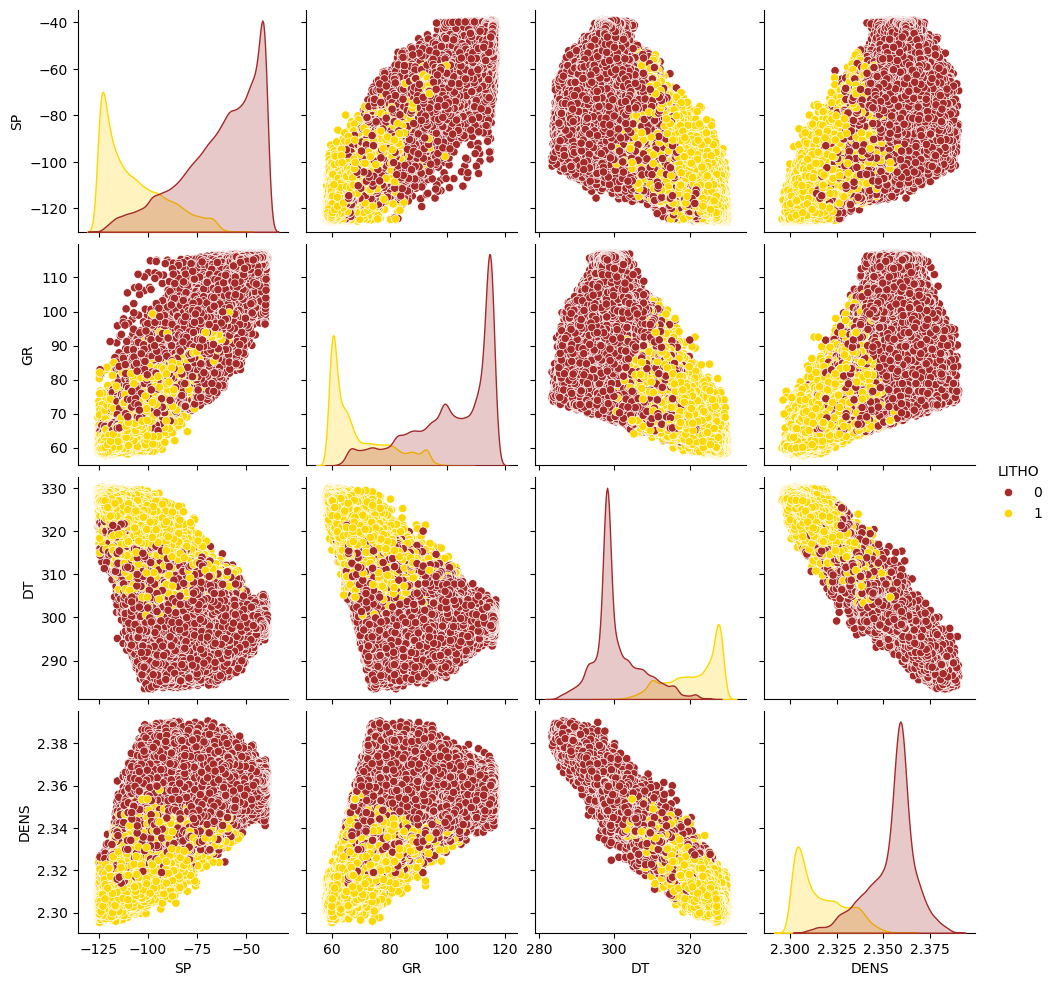

In [5]:
# Проведем визуальную оценку имеющийся информации
target_logs = [
    log for log in train_data.columns if log not in ["LITHO", "Well", "DEPT"]
]
sns.pairplot(train_data, vars=target_logs, hue="LITHO", palette=["brown", "gold"])

## Подготовка данных и построение базовой модели

В представленном задании перед слушателем стоит 2 цели - индивидуальная и участие в соревновании среди слушателей.

Индивидуальной целью является победа над имеющейся простейшей моделью на тестовом наборе данных.

Соревновательная цель заключается в участии в соревновании среди всех слушателей, во время которого от Вас требуется показать наилучший результат предсказания распределения интервалов коллектора на скрытом наборе данных (скважины находящиеся западнее разлома).

В блоках ниже расположен код, отвечающий за разбитие данных на тренировочную и тестовую части, а также построение базовой модели с последующей оценкой ее качества.

In [6]:
# Разобьем данные на тренировочную и тестовую части в пропорции 0.7 и 0.3 соответственно
train_part_size = 0.7

# Случайно выберем скважины для тренировочного и тестового наборов
rd.seed(17)
train_wells = rd.sample(
    train_data.Well.unique().tolist(),
    round(len(train_data.Well.unique()) * train_part_size),
)
train_set = train_data.loc[train_data.Well.isin(train_wells)]
test_set = train_data.loc[
    train_data.Well.isin(i for i in train_data.Well.unique() if i not in train_wells)
]

In [7]:
# Разобьем данные тренировочной и тестовой частей на матрицу признаков и вектор классов

Feature_train = train_set.drop(["DEPT", "Well", "LITHO"], axis=1)
Target_train = train_set["LITHO"]

Feature_test = test_set.drop(["DEPT", "Well", "LITHO"], axis=1)
Target_test = test_set["LITHO"]

In [8]:
# Здесь мы для предсказания будем использовать одну из самых простых моделей - Метод ближайшего соседа
# Полученная точность будет взята за планку, которую необходимо побить
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(Feature_train, Target_train)
predicted_litho = clf.predict(Feature_test)

In [9]:
# Посчитаем точность полученную нашей baseline-моделью
# Считаться будут две метрики - F1 и Accuracy
base_acc = accuracy_score(Target_test, predicted_litho)
base_f1 = f1_score(Target_test, predicted_litho)
print(
    "F1 метрика равна %.3f, и доля правильных ответов составляет %.3f для базового кейса."
    % (base_f1, base_acc)
)

F1 метрика равна 0.850, и доля правильных ответов составляет 0.902 для базового кейса.


## Построение модели

Загрузив все необходимые данные, проведя их их предварительную обработку и получив первые предсказания, можно перейти непосредственно к построению собственной модели.
В ячейке ниже создайте свою модель, которая будет называться **user_clf**, предварительно импортировав необходимые библиотеки.
После чего получите с ее помощью предсказание для тестовой части набора **Feature_test**, назвав переменную, хранящую предсказание, именем **user_prediction**.

Вам необходимо выбрать такую модель, которая показала бы более высокую точность предсказания, чем модель в ячейках выше.

In [10]:
# Ваш код здесь
n_neighbors = 2
user_clf = KNeighborsClassifier(n_neighbors=n_neighbors)
user_clf.fit(Feature_train, Target_train)
user_prediction = clf.predict(Feature_test)

In [11]:
# Посчитаем точность полученную моделью слушателя
# Считаться будут две метрики - F1 и Accuracy
user_acc = accuracy_score(Target_test, user_prediction)
user_f1 = f1_score(Target_test, user_prediction)
print(
    "F1 метрика равна %.3f, и доля правильных ответов составляет %.3f для модели слушателя курса."
    % (user_f1, user_acc)
)

F1 метрика равна 0.850, и доля правильных ответов составляет 0.902 для модели слушателя курса.


# Предсказание по скрытым скважинам

На данный момент вы уже имеете наилучшую на ваш взгляд модель. Теперь ее можно использовать для предсказания распределения интервалов коллектора на скрытой части данных. В дальнейшем предсказание каждого слушателя будет проверено по имеющимся реальным меткам коллектора и оценено соответствующими метриками. 
Все участники узнают точность своего предсказания только в конце соревнования, когда будет получен сводный итог.

In [19]:
# В переменную user_name введите свою фамилию и инициалы, как в примере ниже
user_name = "Goncharenko_ad"

In [20]:
# Загружаем данные каротажей по скрытым скважинам и предобрабатываем их
validation_data = pd.read_csv("data/Shestakovo_validation.csv")
Feature_valid = validation_data.drop(["Well", "DEPT"], axis=1)
valid_predict = pd.Series(
    user_clf.predict(Feature_valid), name="%s_prediction" % user_name
)
valid_predict.to_csv("%s_prediction.csv" % user_name, index=None)

## Wavelet решение (LGBM + постобработка)

Нам было очень тяжело, своего времени стократно жаль

1) SWT per-point (db4, level=6) + rolling/diff -> LightGBM, train/test split по скважинам
2) Постобработка: сглаживание + удаление коротких сегментов


In [14]:
import numpy as np
import pandas as pd
import random as rd
import pywt
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score



In [15]:
wl_feature_cols = ["SP", "GR", "DT", "DENS"]
wl_target_col = "LITHO"

base_windows = [11, 51, 201]
swt_wavelet = "db4"
swt_level = 6
swt_roll_windows = [11, 51]

eps = 1e-6

def _rolling_stats(arr, window):
    s = pd.Series(arr)
    roll = s.rolling(window, center=True, min_periods=1)
    return {
        f"rm{window}": roll.mean().to_numpy(np.float32),
        f"rs{window}": roll.std(ddof=0).fillna(0).to_numpy(np.float32),
        f"rmin{window}": roll.min().to_numpy(np.float32),
        f"rmax{window}": roll.max().to_numpy(np.float32),
        f"rmed{window}": roll.median().to_numpy(np.float32),
    }

def compute_base_features(g, feature_cols, windows):
    out = {}
    for col in feature_cols:
        x = g[col].to_numpy(np.float32)
        out[col] = x
        diff = np.diff(x, prepend=x[0])
        diff2 = np.diff(diff, prepend=diff[0])
        out[f"{col}_diff"] = diff
        out[f"{col}_diff2"] = diff2
        out[f"{col}_absdiff"] = np.abs(diff)
        for w in windows:
            stats = _rolling_stats(x, w)
            for k, v in stats.items():
                out[f"{col}_{k}"] = v
            diff_energy = pd.Series(diff ** 2).rolling(
                w, center=True, min_periods=1
            ).mean().to_numpy(np.float32)
            out[f"{col}_rdiff_energy{w}"] = diff_energy
    return pd.DataFrame(out)

def swt_coeffs(signal, wavelet, level):
    n = len(signal)
    if level <= 0:
        return [], [], 0
    pad_to = int(np.ceil(n / (2 ** level)) * (2 ** level))
    if pad_to < 2 ** level:
        pad_to = 2 ** level
    pad = pad_to - n
    if pad:
        signal = np.pad(signal, (0, pad), mode="symmetric")
    actual_level = level
    try:
        coeffs = pywt.swt(signal, wavelet, level=level, start_level=0, axis=0)
    except ValueError:
        max_level = pywt.swt_max_level(len(signal))
        actual_level = min(level, max_level)
        if actual_level <= 0:
            return [], [], 0
        pad = (-n) % (2 ** actual_level)
        if pad:
            signal = np.pad(signal, (0, pad), mode="symmetric")
        coeffs = pywt.swt(signal, wavelet, level=actual_level, start_level=0, axis=0)
    cA_list = []
    cD_list = []
    for cA, cD in coeffs:
        cA_list.append(cA[:n])
        cD_list.append(cD[:n])
    return cA_list, cD_list, actual_level

def compute_swt_features(g, feature_cols, wavelet, level, roll_windows):
    out = {}
    for col in feature_cols:
        x = g[col].to_numpy(np.float32)
        cA_list, cD_list, actual_level = swt_coeffs(x, wavelet, level)
        abs_cd = []
        n = len(x)
        for j in range(1, level + 1):
            if j <= actual_level:
                cA = cA_list[j - 1]
                cD = cD_list[j - 1]
                abs_d = np.abs(cD).astype(np.float32)
            else:
                cA = np.zeros(n, dtype=np.float32)
                cD = np.zeros(n, dtype=np.float32)
                abs_d = np.zeros(n, dtype=np.float32)
            abs_cd.append(abs_d)
            out[f"SWT_{col}_L{j}_abs"] = abs_d
            out[f"SWT_{col}_L{j}_pow2"] = (cD ** 2).astype(np.float32)
            out[f"SWT_{col}_L{j}_contrast"] = (
                abs_d / (np.abs(cA) + eps)
            ).astype(np.float32)
            for w in roll_windows:
                roll = pd.Series(abs_d).rolling(
                    w, center=True, min_periods=1
                ).mean().to_numpy(np.float32)
                out[f"SWT_{col}_L{j}_abs_rm{w}"] = roll
        if level >= 6:
            out[f"SWT_{col}_abs_ratio_L1_L6"] = (
                abs_cd[0] / (abs_cd[5] + eps)
            ).astype(np.float32)
            low_energy = np.zeros(n, dtype=np.float32)
            high_energy = np.zeros(n, dtype=np.float32)
            if actual_level >= 2:
                low_energy = (cD_list[0] ** 2 + cD_list[1] ** 2).astype(np.float32)
            if actual_level >= 6:
                high_energy = (cD_list[4] ** 2 + cD_list[5] ** 2).astype(np.float32)
            out[f"SWT_{col}_energy_ratio_L12_L56"] = (
                low_energy / (high_energy + eps)
            ).astype(np.float32)
    return pd.DataFrame(out)

def build_features(df, wells, feature_cols, target_col=None, return_groups=False, return_index=False):
    wells_set = set(wells)
    features = []
    targets = []
    groups = []
    indices = []
    for well, g in df.groupby("Well"):
        if well not in wells_set:
            continue
        g = g.sort_values("DEPT")
        base = compute_base_features(g, feature_cols, base_windows)
        swt = compute_swt_features(g, feature_cols, swt_wavelet, swt_level, swt_roll_windows)
        feat = pd.concat([base, swt], axis=1)

        depth = g["DEPT"].to_numpy(np.float32)
        depth_rel = (depth - depth.min()) / (depth.max() - depth.min() + eps)
        feat["DEPTH_REL"] = depth_rel

        features.append(feat)
        indices.append(g.index.to_numpy())
        if return_groups:
            groups.append(np.full(len(g), well, dtype=object))
        if target_col is not None:
            targets.append(g[target_col].astype(int).to_numpy(np.int32))

    X = pd.concat(features, ignore_index=True)
    y = np.concatenate(targets) if targets else None
    idx = np.concatenate(indices) if indices else None
    grp = np.concatenate(groups) if groups else None
    if return_groups and return_index:
        return X, y, grp, idx
    if return_groups:
        return X, y, grp
    if return_index:
        return X, y, idx
    return X, y


In [16]:
if "train_set" not in globals() or "test_set" not in globals():
    raise RuntimeError("Сначала выполните ячейки с train_set/test_set.")

train_wells = sorted(train_set.Well.unique().tolist())
test_wells = sorted(test_set.Well.unique().tolist())

X_train, y_train, idx_train = build_features(
    train_set, train_wells, wl_feature_cols, wl_target_col, return_index=True
)
X_test, y_test, idx_test = build_features(
    test_set, test_wells, wl_feature_cols, wl_target_col, return_index=True
)

X_train = X_train.astype(np.float32)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0.0).astype(np.float32)

def best_threshold(y_true, y_prob):
    best_thr = 0.5
    best_f1 = -1.0
    for thr in np.linspace(0.1, 0.9, 81):
        pred = (y_prob >= thr).astype(int)
        f1 = f1_score(y_true, pred)
        if f1 > best_f1:
            best_f1 = f1
            best_thr = float(thr)
    return best_thr, best_f1

lgb_params = {
    "objective": "binary",
    "metric": "binary_logloss",
    "num_leaves": 128,
    "learning_rate": 0.05,
    "feature_fraction": 0.8,
    "bagging_fraction": 0.8,
    "bagging_freq": 1,
    "min_data_in_leaf": 100,
    "verbosity": -1,
}

pos = y_train.sum()
neg = len(y_train) - pos
params = dict(lgb_params)
params["scale_pos_weight"] = float(neg / max(pos, 1))

dtrain = lgb.Dataset(X_train, label=y_train)
dvalid = lgb.Dataset(X_test, label=y_test)

lgbm_model = lgb.train(
    params,
    dtrain,
    num_boost_round=2000,
    valid_sets=[dvalid],
    callbacks=[lgb.early_stopping(200), lgb.log_evaluation(200)],
)

lgbm_test_pred = lgbm_model.predict(X_test, num_iteration=lgbm_model.best_iteration)
lgbm_best_threshold, lgbm_best_f1 = best_threshold(y_test, lgbm_test_pred)
test_acc = accuracy_score(y_test, (lgbm_test_pred >= lgbm_best_threshold).astype(int))
print(f"LGBM F1: {lgbm_best_f1:.4f} at thr={lgbm_best_threshold:.2f}, Acc={test_acc:.4f}")


Training until validation scores don't improve for 200 rounds
[200]	valid_0's binary_logloss: 0.0679951
[400]	valid_0's binary_logloss: 0.065314
[600]	valid_0's binary_logloss: 0.0666277
Early stopping, best iteration is:
[406]	valid_0's binary_logloss: 0.0652476
LGBM F1: 0.9612 at thr=0.66, Acc=0.9749


### Optuna: перебор гиперпараметров LGBM (опционально)

После подбора обновите `lgb_params` и повторно выполните ячейку с LGBM train/test.


In [17]:
import optuna

optuna_trials = 10
optuna_num_boost_round = 1200
optuna_early_stopping = 150

best_model = None
best_thr = None
best_f1_global = -1.0
best_iter = None

def lgbm_holdout_score(params):
    global best_model, best_thr, best_f1_global, best_iter

    pos = y_train.sum()
    neg = len(y_train) - pos

    params = dict(params)
    params["scale_pos_weight"] = float(neg / max(pos, 1))

    dtrain = lgb.Dataset(X_train, label=y_train)
    dvalid = lgb.Dataset(X_test, label=y_test)

    model = lgb.train(
        params,
        dtrain,
        num_boost_round=optuna_num_boost_round,
        valid_sets=[dvalid],
        callbacks=[
            lgb.early_stopping(optuna_early_stopping),
            lgb.log_evaluation(0),
        ],
    )

    preds = model.predict(X_test, num_iteration=model.best_iteration)
    thr, f1 = best_threshold(y_test, preds)

    if f1 > best_f1_global:
        best_f1_global = float(f1)
        best_model = model
        best_thr = float(thr)
        best_iter = int(model.best_iteration)

    return f1

def objective(trial):
    print(f"[Optuna] Trial {trial.number + 1}/{optuna_trials}")

    params = dict(lgb_params)
    params["num_leaves"] = trial.suggest_int("num_leaves", 64, 256)
    params["learning_rate"] = trial.suggest_float("learning_rate", 0.03, 0.08)
    params["feature_fraction"] = trial.suggest_float("feature_fraction", 0.7, 0.9)
    params["bagging_fraction"] = trial.suggest_float("bagging_fraction", 0.7, 0.9)
    params["min_data_in_leaf"] = trial.suggest_int("min_data_in_leaf", 50, 300)

    return lgbm_holdout_score(params)

optuna.logging.set_verbosity(optuna.logging.WARNING)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=optuna_trials)

print("\n========== OPTUNA DONE ==========")
print("Best F1 (study):", study.best_value)
print("Best params:", study.best_params)

lgb_params.update(study.best_params)

print("\n========== BEST SAVED MODEL ==========")
print("Best F1 (saved):", best_f1_global)
print("Best thr (saved):", best_thr)
print("Best iteration (saved):", best_iter)



[Optuna] Trial 1/10
Training until validation scores don't improve for 150 rounds
Early stopping, best iteration is:
[184]	valid_0's binary_logloss: 0.0648926
[Optuna] Trial 2/10
Training until validation scores don't improve for 150 rounds
Early stopping, best iteration is:
[465]	valid_0's binary_logloss: 0.0667307
[Optuna] Trial 3/10
Training until validation scores don't improve for 150 rounds
Early stopping, best iteration is:
[409]	valid_0's binary_logloss: 0.0665433
[Optuna] Trial 4/10
Training until validation scores don't improve for 150 rounds
Early stopping, best iteration is:
[440]	valid_0's binary_logloss: 0.0665608
[Optuna] Trial 5/10
Training until validation scores don't improve for 150 rounds
Early stopping, best iteration is:
[514]	valid_0's binary_logloss: 0.0663497
[Optuna] Trial 6/10
Training until validation scores don't improve for 150 rounds
Early stopping, best iteration is:
[409]	valid_0's binary_logloss: 0.0675927
[Optuna] Trial 7/10
Training until validation 

In [18]:

validation_data = pd.read_csv("data/Shestakovo_validation.csv")

wells_valid = validation_data["Well"].unique()

X_valid, _, idx_valid = build_features(
    validation_data,
    wells=wells_valid,
    feature_cols=wl_feature_cols,      
    target_col=None,
    return_index=True                  
)


X_valid = X_valid.reindex(columns=X_full.columns, fill_value=0.0)

valid_proba = final_model.predict(X_valid)
valid_pred = (valid_proba >= best_thr).astype(int)

pred_in_original_order = np.empty(len(validation_data), dtype=int)
pred_in_original_order[idx_valid] = valid_pred

user_name = "Goncharenko_do"
subm = pd.Series(pred_in_original_order, name=f"{user_name}_prediction")
subm.to_csv(f"{user_name}_prediction.csv", index=None)

print("✅ Saved:", f"{user_name}_prediction.csv")


NameError: name 'X_full' is not defined

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from catboost import CatBoostClassifier
import lightgbm as lgb

# 1. Feature Engineering (Создание признаков)
def build_features(df):
    # Копируем датасет, чтобы не менять оригинал
    data = df.copy()
    
    # Сортируем по скважине и глубине для корректного вычисления лагов
    data = data.sort_values(['Well', 'DEPT'])
    
    features = ['SP', 'GR', 'DT', 'DENS']
    
    # Добавляем скользящее среднее и стандартное отклонение (контекст пласта)
    for col in features:
        # Окно 1 метр (при шаге 0.1м это 11 точек)
        window = 11
        data[f'{col}_mean'] = data.groupby('Well')[col].transform(lambda x: x.rolling(window, center=True).mean()).fillna(method='bfill').fillna(method='ffill')
        data[f'{col}_std'] = data.groupby('Well')[col].transform(lambda x: x.rolling(window, center=True).std()).fillna(0)
        
        # Разница между текущим значением и средним
        data[f'{col}_diff'] = data[col] - data[f'{col}_mean']
        
        # Лаговые значения (предыдущая и следующая точка)
        data[f'{col}_lag_1'] = data.groupby('Well')[col].shift(1).fillna(method='bfill')
        data[f'{col}_lead_1'] = data.groupby('Well')[col].shift(-1).fillna(method='ffill')

    return data

# Подготовка данных
train_processed = build_features(train_data)
X = train_processed.drop(['DEPT', 'LITHO', 'Well'], axis=1)
y = train_processed['LITHO']

# 2. Настройка модели и Кросс-валидация
# Используем CatBoost, так как он отлично справляется с такими задачами
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
oof_preds = np.zeros(len(X))
models = []

cat_params = {
    'iterations': 5000,
    'learning_rate': 0.05,
    'depth': 7,
    'loss_function': 'Logloss',
    'eval_metric': 'F1',
    'random_seed': 42,
    'verbose': 100,
    'early_stopping_rounds': 300
}

print("Starting Cross-Validation...")
for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    model = CatBoostClassifier(**cat_params)
    model.fit(X_train, y_train, eval_set=(X_val, y_val), use_best_model=True)
    
    models.append(model)
    oof_preds[val_idx] = model.predict(X_val)
    
    score = f1_score(y_val, oof_preds[val_idx], average='weighted')
    print(f"Fold {fold+1} F1 Weighted: {score:.4f}")

total_score = f1_score(y, oof_preds, average='weighted')
print(f"\nFinal OOF F1 Weighted Score: {total_score:.5f}")

# 3. Предсказание для валидационного набора
# Загружаем Shestakovo_validation.csv
validation_data = pd.read_csv("data/Shestakovo_validation.csv")
# Если названия колонок отличаются, приведите их к формату train_data
# validation_data.columns = ["DEPT", "SP", "GR", "DT", "DENS", "Well"]

valid_processed = build_features(validation_data)
X_test = valid_processed.drop(['DEPT', 'Well'], axis=1, errors='ignore')

# Усредняем предсказания всех моделей из кросс-валидации
test_preds_proba = np.zeros(len(X_test))
for model in models:
    test_preds_proba += model.predict_proba(X_test)[:, 1]

test_preds_proba /= len(models)
final_preds = (test_preds_proba > 0.5).astype(int)

# Сохранение результата
user_name = "Goncharenko_DO"
subm = pd.Series(final_preds, name=f"{user_name}_prediction")
subm.to_csv(f"{user_name}_prediction.csv", index=None)
print("Submission saved!")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24192\1840007905.py:22: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[f'{col}_mean'] = data.groupby('Well')[col].transform(lambda x: x.rolling(window, center=True).mean()).fillna(method='bfill').fillna(method='ffill')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24192\1840007905.py:29: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[f'{col}_lag_1'] = data.groupby('Well')[col].shift(1).fillna(method='bfill')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24192\1840007905.py:30: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[f'{col}_lead_1'] = data.groupby('Well')[col].shift(-1).fillna(method='ffill')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24192\1840007905.py:22: Fu

Starting Cross-Validation...
0:	learn: 0.8780164	test: 0.8826811	best: 0.8826811 (0)	total: 29.5ms	remaining: 2m 27s
100:	learn: 0.9237614	test: 0.9230359	best: 0.9231648 (99)	total: 2.4s	remaining: 1m 56s
200:	learn: 0.9371014	test: 0.9342461	best: 0.9342461 (200)	total: 4.64s	remaining: 1m 50s
300:	learn: 0.9440943	test: 0.9375000	best: 0.9376380 (298)	total: 6.84s	remaining: 1m 46s
400:	learn: 0.9490912	test: 0.9402445	best: 0.9402445 (400)	total: 9.09s	remaining: 1m 44s
500:	learn: 0.9528307	test: 0.9418392	best: 0.9422243 (484)	total: 11.3s	remaining: 1m 41s
600:	learn: 0.9559769	test: 0.9422469	best: 0.9423948 (523)	total: 13.5s	remaining: 1m 38s
700:	learn: 0.9585289	test: 0.9434293	best: 0.9434293 (700)	total: 15.9s	remaining: 1m 37s
800:	learn: 0.9614608	test: 0.9442266	best: 0.9445671 (774)	total: 18.2s	remaining: 1m 35s
900:	learn: 0.9638240	test: 0.9455168	best: 0.9457093 (884)	total: 20.5s	remaining: 1m 33s
1000:	learn: 0.9664144	test: 0.9462701	best: 0.9463381 (998)	total

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24192\1840007905.py:22: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[f'{col}_mean'] = data.groupby('Well')[col].transform(lambda x: x.rolling(window, center=True).mean()).fillna(method='bfill').fillna(method='ffill')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24192\1840007905.py:29: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[f'{col}_lag_1'] = data.groupby('Well')[col].shift(1).fillna(method='bfill')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24192\1840007905.py:30: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[f'{col}_lead_1'] = data.groupby('Well')[col].shift(-1).fillna(method='ffill')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24192\1840007905.py:22: Fu

Submission saved!


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from catboost import CatBoostClassifier
from scipy.signal import medfilt

# 1. Расширенный Feature Engineering
def build_features_v2(df):
    data = df.copy()
    data = data.sort_values(['Well', 'DEPT'])
    
    features = ['SP', 'GR', 'DT', 'DENS']
    
    # Нормализация относительно среднего по конкретной скважине
    # (Помогает, если оборудование в скважинах калибровано по-разному)
    for col in features:
        data[f'{col}_well_norm'] = data[col] / data.groupby('Well')[col].transform('mean')

    for col in features:
        # Скользящие окна разного размера для захвата микро- и макро-текстур
        for w in [5, 11, 21]:
            data[f'{col}_mean_{w}'] = data.groupby('Well')[col].transform(lambda x: x.rolling(w, center=True).mean()).fillna(method='bfill').fillna(method='ffill')
        
        # Градиент (скорость изменения кривой)
        data[f'{col}_grad'] = data.groupby('Well')[col].diff().fillna(0)
        
        # Лаги и опережения (контекст соседних 20 см)
        data[f'{col}_lag_1'] = data.groupby('Well')[col].shift(1).fillna(method='bfill')
        data[f'{col}_lead_1'] = data.groupby('Well')[col].shift(-1).fillna(method='ffill')
        data[f'{col}_lag_2'] = data.groupby('Well')[col].shift(2).fillna(method='bfill')
        data[f'{col}_lead_2'] = data.groupby('Well')[col].shift(-2).fillna(method='ffill')

    return data

# Подготовка
train_processed = build_features_v2(train_data)
X = train_processed.drop(['DEPT', 'LITHO', 'Well'], axis=1)
y = train_processed['LITHO']

# 2. Настройка модели (Параметры подобраны для высокой точности)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
oof_preds = np.zeros(len(X))
models = []

cat_params = {
    'iterations': 6000,
    'learning_rate': 0.03, # Уменьшили шаг для более тонкой настройки
    'depth': 8,            # Увеличили глубину до 8
    'l2_leaf_reg': 5,      # Добавили регуляризацию
    'loss_function': 'Logloss',
    'eval_metric': 'F1',
    'random_seed': 42,
    'verbose': 200,
    'early_stopping_rounds': 400,
    'task_type': 'GPU'     # Можно сменить на GPU, если есть
}

print("Training with advanced features...")
for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    model = CatBoostClassifier(**cat_params)
    model.fit(X_train, y_train, eval_set=(X_val, y_val), use_best_model=True)
    
    models.append(model)
    oof_preds[val_idx] = model.predict(X_val)
    print(f"Fold {fold+1} F1: {f1_score(y_val, oof_preds[val_idx], average='weighted'):.5f}")

# 3. Пост-процессинг (Убираем "выбросы")
# Литологические пласты обычно имеют мощность более 10-20 см.
# Одиночные точки-предсказания часто являются ошибкой.
def apply_medfilt(preds, kernel=3):
    return medfilt(preds, kernel_size=kernel)

# Применяем фильтр к OOF для проверки
oof_preds_filtered = apply_medfilt(oof_preds)
print(f"\nScore before filtering: {f1_score(y, oof_preds, average='weighted'):.5f}")
print(f"Score after filtering: {f1_score(y, oof_preds_filtered, average='weighted'):.5f}")

# 4. Валидация и сабмит
valid_processed = build_features_v2(validation_data)
X_test = valid_processed.drop(['DEPT', 'Well'], axis=1, errors='ignore')

# Ансамбль
test_preds_proba = np.zeros(len(X_test))
for model in models:
    test_preds_proba += model.predict_proba(X_test)[:, 1]

test_preds_proba /= len(models)
final_preds = (test_preds_proba > 0.48).astype(int) # Смещение порога чуть вниз часто помогает в F1

# Очищаем финальный результат фильтром
final_preds_smooth = apply_medfilt(final_preds, kernel=3)

subm = pd.Series(final_preds_smooth, name="Goncharenko_DO_prediction")
subm.to_csv("Goncharenko_DO2_prediction.csv", index=None)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24192\2705936473.py:23: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[f'{col}_mean_{w}'] = data.groupby('Well')[col].transform(lambda x: x.rolling(w, center=True).mean()).fillna(method='bfill').fillna(method='ffill')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24192\2705936473.py:23: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[f'{col}_mean_{w}'] = data.groupby('Well')[col].transform(lambda x: x.rolling(w, center=True).mean()).fillna(method='bfill').fillna(method='ffill')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24192\2705936473.py:23: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[f'{col}_mean_{w}'] = data.groupby('Well')[col].transform(lambda x: x.rolling(w,

Training with advanced features...
0:	learn: 0.8818012	test: 0.8800279	best: 0.8800279 (0)	total: 8.94ms	remaining: 53.6s
200:	learn: 0.9430184	test: 0.9384943	best: 0.9384943 (200)	total: 1.72s	remaining: 49.6s
400:	learn: 0.9550517	test: 0.9468831	best: 0.9468912 (398)	total: 3.44s	remaining: 48s
600:	learn: 0.9622021	test: 0.9507160	best: 0.9507922 (587)	total: 5.16s	remaining: 46.4s
800:	learn: 0.9673165	test: 0.9517893	best: 0.9521052 (759)	total: 6.87s	remaining: 44.6s
1000:	learn: 0.9710451	test: 0.9534662	best: 0.9535752 (994)	total: 8.61s	remaining: 43s
1200:	learn: 0.9740251	test: 0.9543878	best: 0.9546927 (1185)	total: 10.3s	remaining: 41.1s
1400:	learn: 0.9770793	test: 0.9553786	best: 0.9555674 (1381)	total: 12s	remaining: 39.3s
1600:	learn: 0.9795312	test: 0.9562002	best: 0.9562433 (1570)	total: 13.6s	remaining: 37.5s
1800:	learn: 0.9814993	test: 0.9571184	best: 0.9572311 (1796)	total: 15.3s	remaining: 35.8s
2000:	learn: 0.9837093	test: 0.9576423	best: 0.9576520 (1917)	tot

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24192\2705936473.py:23: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[f'{col}_mean_{w}'] = data.groupby('Well')[col].transform(lambda x: x.rolling(w, center=True).mean()).fillna(method='bfill').fillna(method='ffill')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24192\2705936473.py:23: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[f'{col}_mean_{w}'] = data.groupby('Well')[col].transform(lambda x: x.rolling(w, center=True).mean()).fillna(method='bfill').fillna(method='ffill')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24192\2705936473.py:23: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[f'{col}_mean_{w}'] = data.groupby('Well')[col].transform(lambda x: x.rolling(w,